# Case Study 5 - Firewall Traffic

__Team Members:__ Amber Clark, Andrew Leppla, Jorge Olmos, Paritosh Rai

# Content
* [Business Understanding](#business-understanding)
  - [Introduction](#introduction)
  - [Methods](#methods)
  - [Results](#results)
* [Data Engineering](#data-evaluation)
  - [Data Summary](#data-summary)
  - [Loading Data](#loading-data) 
  - [Missing Values](#missing-values)
  - [Exploratory Data Analysis (EDA)](#eda)
  - [Assumptions](#assumptions)
* [Model Preparations](#model-preparations)
* [Model Building & Evaluations](#model-building)
* [Conclusion](#conclusion)
  - [Final Model Proposal](#final-model-proposal)
  - [Future Considerations and Model Enhancements](#model-enhancements)


# Business Understanding & Executive Summary <a id='business-understanding'/>

### Objective <a id='scope'/>


### Introduction <a id='introduction'/>

### Methods <a id='methods'/>

#### Data Wrangling


#### Modeling


#### Metrics
 

#### Modeling Objective

The team's objective was to maximize __accuracy__ and __F1__ while minimizing the __processing time__ to make predictions in real time.

### Results <a id='results'/>

# Data Engineering <a id='data-evaluation'>
    

## Data Summary

In [1]:
# standard libraries
import pandas as pd
import numpy as np
#import re
import os

#from IPython.display import Image
#import sklearn
#import time
# email

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
#from tabulate import tabulate
#from collections import defaultdict
#from collections import  Counter

# data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

# prediction models
from sklearn.svm import SVC

#metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

### Loading Data and Cleanup <a id='loading-data'>

As part of data cleanup, team removed HTML tags, stop words, and non-alphanumeric characters.

In [2]:
fp = os.path.join(os.getcwd()+'/'+'log2.csv')
fp

'C:\\Users\\allep\\QTW_Projects\\QTW-SPRING-2022\\ds7333_case_study_5/log2.csv'

In [3]:
df = pd.read_csv(fp)

In [4]:
df.shape

(65532, 12)

In [5]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [7]:
df['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

#### Recode 'Action' as binary response

In [8]:
df.loc[ df['Action']!='allow', 'Action' ]='not allow'

In [9]:
df['Action'].value_counts()

allow        37640
not allow    27892
Name: Action, dtype: int64

In [10]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


### Recode "Port" variables as object/string in df1

In [11]:
port_vars = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']
cont_vars = list( set(df.columns) - set(port_vars) - set(['Action']) )
cont_vars

['Bytes Received',
 'Elapsed Time (sec)',
 'Packets',
 'Bytes',
 'pkts_received',
 'Bytes Sent',
 'pkts_sent']

## Missing Values <a id='missing-values'>
No missing values in the dataset

In [12]:
df.isna().values.sum()

0

## Exploratory Data Analysis (EDA) <a id='eda'>

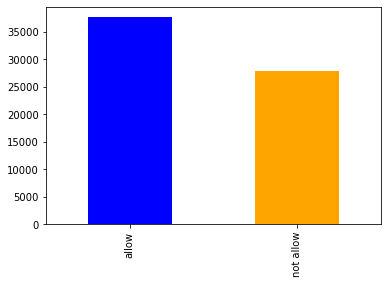

In [13]:
count_Class=pd.value_counts(df['Action'], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.show()

In [14]:
df['Action'].value_counts(normalize=True)

allow        0.574376
not allow    0.425624
Name: Action, dtype: float64

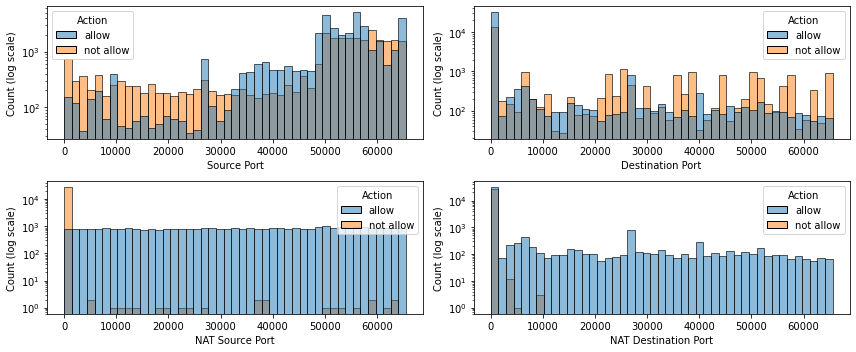

In [15]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 5))

for i,j in zip( port_vars, range(len(port_vars)) ):
    sns.histplot(ax=axes[int(j/cols),j%cols], data = df, x=df[i], hue = 'Action', bins=45, log_scale=[False,True])
    axes[int(j/cols),j%cols].set_xlabel(i)
    axes[int(j/cols),j%cols].set_ylabel('Count (log scale)')
    
fig.tight_layout() 
plt.show()

### Most of 'not allow' occurs near continuous features minimum values
The firewall is working - little to no traffic occurs for 'not allow'

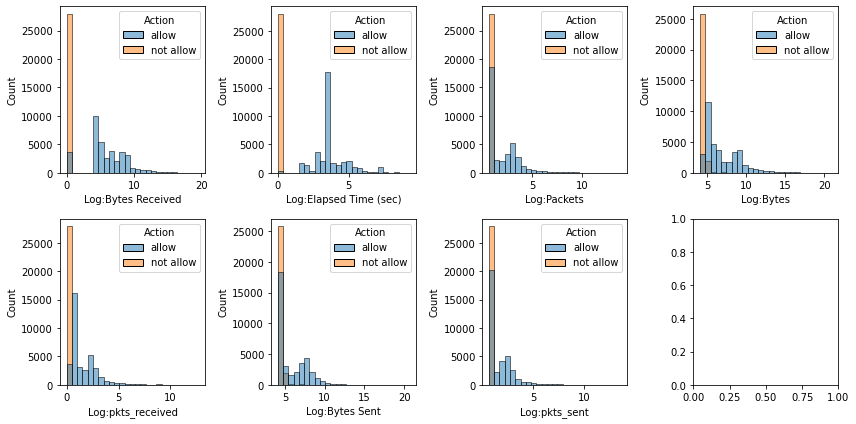

In [17]:
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i,j in zip(cont_vars,range(len(cont_vars))):
    sns.histplot(ax=axes[int(j/cols),j%cols], data = df, x=np.log(df[i]+1), hue = 'Action', bins=25)
    axes[int(j/cols),j%cols].set_xlabel('Log:'+i)
    axes[int(j/cols),j%cols].set_ylabel('Count')
    
fig.tight_layout() 
plt.show()

### Log Scale of Counts to see skewed distributions better

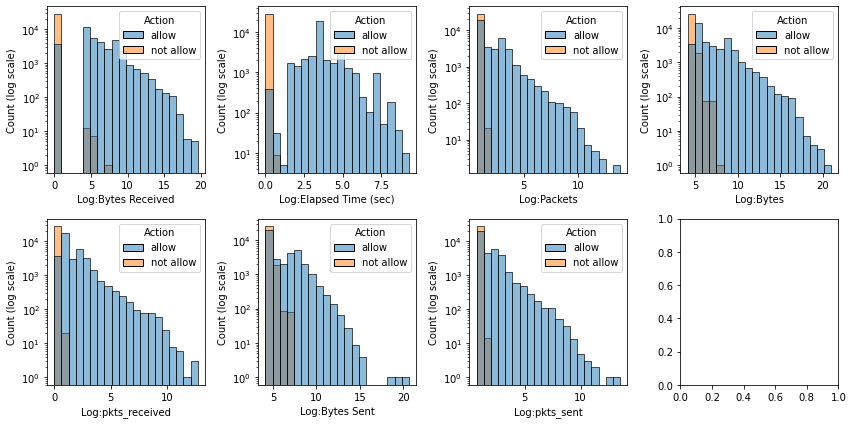

In [18]:
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i,j in zip(cont_vars,range(len(cont_vars))):
    sns.histplot(ax=axes[int(j/cols),j%cols], data = df, x=np.log(df[i]+1), hue = 'Action', bins=20, log_scale=[False,True])
    axes[int(j/cols),j%cols].set_xlabel('Log:'+i)
    axes[int(j/cols),j%cols].set_ylabel('Count (log scale)')
    
fig.tight_layout() 
plt.show()

## Assumptions <a id='assumptions'>

# Model Preparations <a id='model-preparations'/>

### Methods 

#### Models


#### Metrics


# Model Building & Evaluations <a id='model-building'/>

## Split into Training and Test

Data was split into training and test sets with a 70/30 ratio, respectively. 

In [19]:
def split_dependant_and_independant_variables(df: pd.DataFrame, y_var: str):
    X = df.copy()
    y = X[y_var]
    X = X.drop([y_var], axis=1)
    return X, y

In [20]:
def shuffle_split(X, y, test_size, random_state):
    stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_index, test_index in stratified_shuffle_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

#### Positive class = 'allow'

In [21]:
X, y = split_dependant_and_independant_variables(df, 'Action')
y = (y=='allow').astype(int)

In [22]:
X_train, X_test, y_train, y_test = shuffle_split(X, y, test_size=0.3, random_state=123432)

In [23]:
y_train.value_counts(normalize=True)

1    0.574381
0    0.425619
Name: Action, dtype: float64

In [24]:
y_test.value_counts(normalize=True)

1    0.574364
0    0.425636
Name: Action, dtype: float64

In [25]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame( sc.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test_sc = pd.DataFrame( sc.transform(X_test), columns = X_test.columns, index = X_test.index)

## Feature Selection


## Modeling

Model Performance is discussed in the conclusion.

### Baseline Accuracy
If the model simply predicted everything as 'allow', it would be 57% accurate.  

In [26]:
# Baseline accuracy of 57% with class imbalance
df['Action'].value_counts(normalize=True)

allow        0.574376
not allow    0.425624
Name: Action, dtype: float64

### Linear SVM

In [27]:
svm_linear_acc = pd.DataFrame()
for i in [0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 10, 100]:
    svm_linear = SVC(kernel='linear', C=i)
    svm_linear.fit(X_train_sc, y_train)
    y_hat_train = svm_linear.predict(X_train_sc)
    y_hat_test = svm_linear.predict(X_test_sc)
    svm_linear_acc = svm_linear_acc.append({'C': i,
                                            '# support vectors': len(svm_linear.support_vectors_),
                                            'accuracy_train': accuracy_score(y_train, y_hat_train),
                                            'accuracy_test': accuracy_score(y_test, y_hat_test)},
                                           ignore_index=True)
    print("C =", i, "complete")
clear_output()
svm_linear_acc

,C,# support vectors,accuracy_train,accuracy_test
0,0.005,6613.0,0.970723,0.971974
1,0.010,5107.0,0.977939,0.978789
2,0.050,2806.0,0.991062,0.990844
3,0.100,2158.0,0.992937,0.992981
4,0.200,1662.0,0.997733,0.997711
5,0.500,1116.0,0.997646,0.997609
6,1.000,817.0,0.997602,0.997660
7,2.000,608.0,0.997711,0.997660
8,10.000,420.0,0.997580,0.997558
9,100.000,329.0,0.997646,0.997609


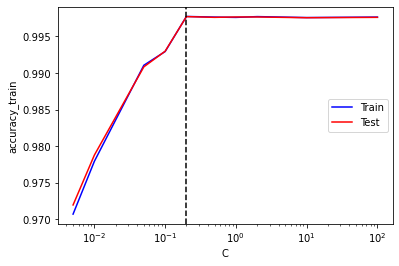

In [28]:
sns.lineplot(data = svm_linear_acc, x='C', y='accuracy_train', color='blue')
sns.lineplot(data = svm_linear_acc, x='C', y='accuracy_test', color='red')
plt.legend(['Train','Test'], loc='center right')
plt.axvline(0.2, color='black', ls='--') 
plt.xscale('log')
plt.show()

#### Linear SVM Coefficients

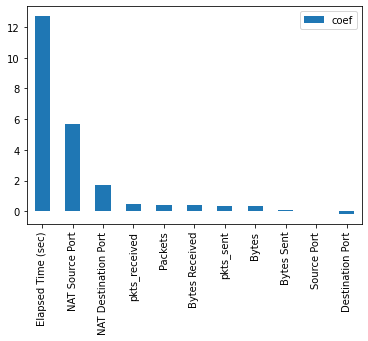

In [29]:
svm_linear = SVC(kernel='linear', C=0.2)
svm_linear.fit(X_train_sc, y_train)
y_hat_train_full = svm_linear.predict(X_train_sc)
y_hat_test_full = svm_linear.predict(X_test_sc)

weights = pd.DataFrame(svm_linear.coef_[0], X_train_sc.columns, columns=['coef']).sort_values('coef', ascending=False)
weights.plot(kind='bar')
plt.show()

In [30]:
# look at the linear support vectors
print("Total # of support vectors =", len(svm_linear.support_vectors_))
print("# of support vectors for each class=", svm_linear.n_support_) 

Total # of support vectors = 1662
# of support vectors for each class= [831 831]


#### Make Simplified Linear Model with Two Terms that have Highest Coefficients

In [31]:
top2_terms = [weights.index[0], weights.index[1]]
svm_linear2 = SVC(kernel='linear', C=0.2)
svm_linear2.fit(X_train_sc[top2_terms], y_train)
y_hat_train2 = svm_linear2.predict(X_train_sc[top2_terms])
y_hat_test2 = svm_linear2.predict(X_test_sc[top2_terms])
print('# support vectors', len(svm_linear2.support_vectors_))
print('accuracy_train', accuracy_score(y_train, y_hat_train2))
print('accuracy_test', accuracy_score(y_test, y_hat_test2))

# support vectors 1808
accuracy_train 0.9966646320195326
accuracy_test 0.9966937945066124


#### Plot the support vectors and decision boundary

In [32]:
def plot_svc_linear_vectors(model, X, y):

    weights = pd.DataFrame(model.coef_[0], X.columns, columns=['coef']).sort_values('coef', ascending=False)
    
    # plot X data for Allow
    pos_class_index = np.where(y==1)
    plt.scatter(X.iloc[pos_class_index][weights.index[0]], 
                X.iloc[pos_class_index][weights.index[1]],
                color='red', marker='x', label='Allow')

    # plot X data for Not Allow
    neg_class_index = np.where(y==0)
    plt.scatter(X.iloc[neg_class_index][weights.index[0]], 
                X.iloc[neg_class_index][weights.index[1]],
                color='blue', marker='o', label='Not Allow')

    # add labels
    plt.xlabel('Scaled: ' + weights.index[0])
    plt.ylabel('Scaled: ' + weights.index[1])
    plt.legend(loc='upper left')

    # plot support vectors
    ax = plt.gca()
    ax.scatter(model.support_vectors_[:, X.columns.get_loc(weights.index[0])],
               model.support_vectors_[:, X.columns.get_loc(weights.index[1])],
               s=100, linewidth=0.2, facecolors='none', edgecolor='black')

In [33]:
def plot_svc_decision_boundary(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolors='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

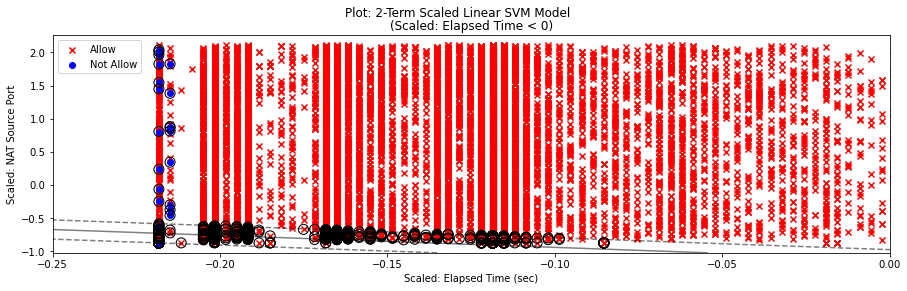

In [34]:
plt.figure(figsize=(15,4))
plot_svc_linear_vectors(svm_linear2, X_train_sc[top2_terms], y_train)
plot_svc_decision_boundary(svm_linear2)
plt.suptitle('Plot: 2-Term Scaled Linear SVM Model')
plt.title('(Scaled: Elapsed Time < 0)')
plt.xlim([-0.25, 0])
plt.show()

#### Shift scaled values by +1 so they're all >0 for log scaling

In [35]:
svm_linear2_pos = SVC(kernel='linear', C=0.2)
svm_linear2_pos.fit(X_train_sc[top2_terms]+1, y_train)
y_hat_train2_pos = svm_linear2_pos.predict(X_train_sc[top2_terms]+1)
y_hat_test2_pos = svm_linear2_pos.predict(X_test_sc[top2_terms]+1)
print('# support vectors', len(svm_linear2_pos.support_vectors_))
print('accuracy_train', accuracy_score(y_train, y_hat_train2_pos))
print('accuracy_test', accuracy_score(y_test, y_hat_test2_pos))

# support vectors 1808
accuracy_train 0.9966646320195326
accuracy_test 0.9966937945066124


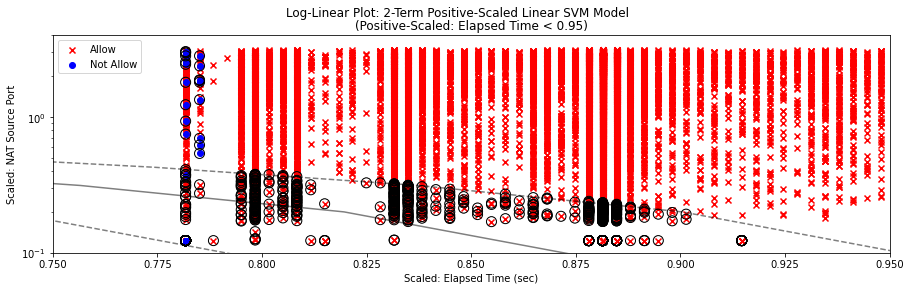

In [36]:
plt.figure(figsize=(15,4))
plot_svc_linear_vectors(svm_linear2_pos, X_train_sc[top2_terms]+1, y_train)
plot_svc_decision_boundary(svm_linear2_pos)
plt.suptitle('Log-Linear Plot: 2-Term Positive-Scaled Linear SVM Model')
plt.title('(Positive-Scaled: Elapsed Time < 0.95)')
plt.xlim([0.75, 0.95])
plt.ylim([0.1, 4])
plt.yscale('log')
plt.show()

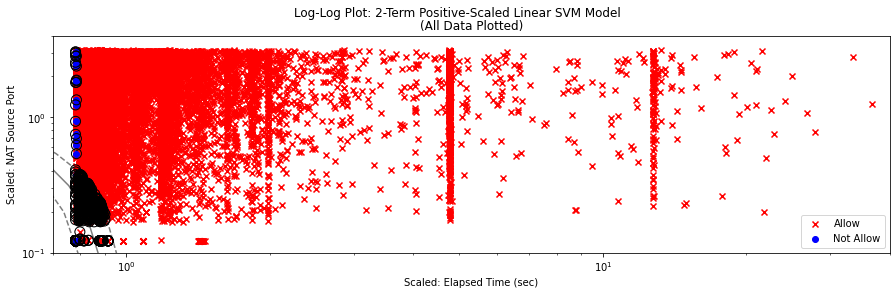

In [54]:
plt.figure(figsize=(15,4))
plot_svc_linear_vectors(svm_linear2_pos, X_train_sc[top2_terms]+1, y_train)
plot_svc_decision_boundary(svm_linear2_pos)
plt.suptitle('Log-Log Plot: 2-Term Positive-Scaled Linear SVM Model')
plt.title('(All Data Plotted)')
plt.legend(loc='lower right')
plt.xlim([0.7, 40])
plt.ylim([0.1, 4])
plt.xscale('log')
plt.yscale('log')
plt.show()

### Gaussian SVM Model

In [38]:
svm_rbf2_acc = pd.DataFrame()
for i in [0.1, 0.5, 1, 5, 10, 100, 200, 300, 500, 700]:
    svm_rbf2 = SVC(kernel='rbf', C=i)
    svm_rbf2.fit(X_train_sc[top2_terms], y_train)
    y_hat_train = svm_rbf2.predict(X_train_sc[top2_terms])
    y_hat_test = svm_rbf2.predict(X_test_sc[top2_terms])
    svm_rbf2_acc = svm_rbf2_acc.append({'C': i,
                                        '# support vectors': len(svm_rbf2.support_vectors_),
                                        'accuracy_train': accuracy_score(y_train, y_hat_train),
                                        'accuracy_test': accuracy_score(y_test, y_hat_test)},
                                       ignore_index=True)
    print("C =", i, "complete")
clear_output()
svm_rbf2_acc

,C,# support vectors,accuracy_train,accuracy_test
0,0.1,2233.0,0.991847,0.991963
1,0.5,1109.0,0.997428,0.997253
2,1.0,840.0,0.997733,0.997660
3,5.0,422.0,0.998082,0.997813
4,10.0,354.0,0.998147,0.997813
5,100.0,268.0,0.998256,0.997965
6,200.0,252.0,0.998321,0.998016
7,300.0,245.0,0.998321,0.998016
8,500.0,244.0,0.998321,0.997864


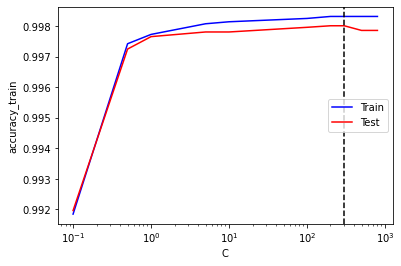

In [62]:
sns.lineplot(data = svm_rbf2_acc, x='C', y='accuracy_train', color='blue')
sns.lineplot(data = svm_rbf2_acc, x='C', y='accuracy_test', color='red')
plt.legend(['Train','Test'], loc='center right')
plt.axvline(300, color='black', ls='--') 
plt.xscale('log')
plt.show()

In [63]:
svm_rbf2 = SVC(kernel='rbf', C=300)
svm_rbf2.fit(X_train_sc[top2_terms], y_train)
y_hat_train_rbf2 = svm_rbf2.predict(X_train_sc[top2_terms])
y_hat_test_rbf2 = svm_rbf2.predict(X_test_sc[top2_terms])

In [75]:
def plot_svc_vectors(model, X, y, top2_terms):
    # no weights with non-linear SVM, need to manually provide top 2 terms
    
    # plot X data for Allow
    pos_class_index = np.where(y==1)
    plt.scatter(X.iloc[pos_class_index][top2_terms[0]], 
                X.iloc[pos_class_index][top2_terms[1]],
                color='red', marker='x', label='Allow')

    # plot X data for Not Allow
    neg_class_index = np.where(y==0)
    plt.scatter(X.iloc[neg_class_index][top2_terms[0]], 
                X.iloc[neg_class_index][top2_terms[1]],
                color='blue', marker='o', label='Not Allow')

    # add labels
    plt.xlabel('Scaled: ' + top2_terms[0])
    plt.ylabel('Scaled: ' + top2_terms[1])
    plt.legend(loc='lower left')

    # plot support vectors
    ax = plt.gca()
    ax.scatter(model.support_vectors_[:, X.columns.get_loc(top2_terms[0])],
               model.support_vectors_[:, X.columns.get_loc(top2_terms[1])],
               s=100, linewidth=0.2, facecolors='none', edgecolor='black')

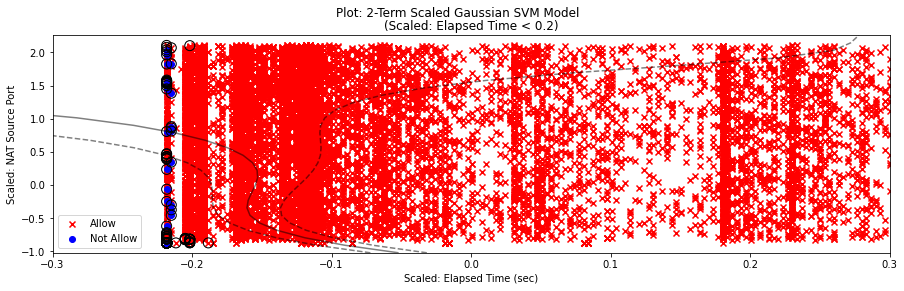

In [76]:
plt.figure(figsize=(15,4))
plot_svc_vectors(svm_rbf2, X_train_sc[top2_terms], y_train, top2_terms)
plot_svc_decision_boundary(svm_rbf2)
plt.suptitle('Plot: 2-Term Scaled Gaussian SVM Model')
plt.title('(Scaled: Elapsed Time < 0.2)')
plt.xlim([-0.3, 0.3])
plt.show()

#### Shift scaled values by +1 so they're all >0 for log scaling

In [67]:
svm_rbf2_pos = SVC(kernel='rbf', C=300)
svm_rbf2_pos.fit(X_train_sc[top2_terms]+1, y_train)
y_hat_train_rbf2_pos = svm_rbf2_pos.predict(X_train_sc[top2_terms]+1)
y_hat_test_rbf2_pos = svm_rbf2_pos.predict(X_test_sc[top2_terms]+1)
print('accuracy_train', accuracy_score(y_train, y_hat_train_rbf2_pos))
print('accuracy_test', accuracy_score(y_test, y_hat_test_rbf2_pos))

accuracy_train 0.9983214161144053
accuracy_test 0.9980162767039674


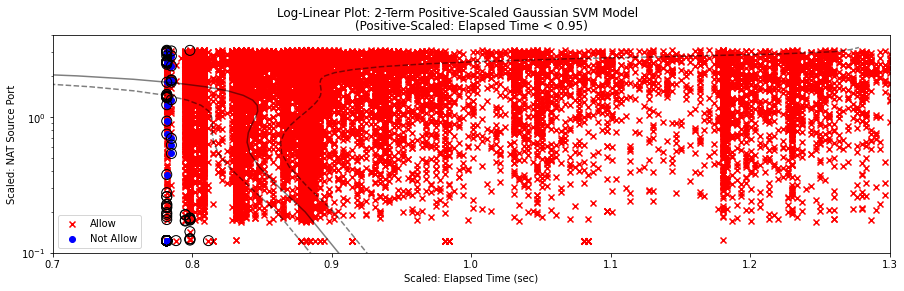

In [82]:
plt.figure(figsize=(15,4))
plot_svc_vectors(svm_rbf2_pos, X_train_sc[top2_terms]+1, y_train, top2_terms)
plot_svc_decision_boundary(svm_rbf2_pos)
plt.suptitle('Log-Linear Plot: 2-Term Positive-Scaled Gaussian SVM Model')
plt.title('(Positive-Scaled: Elapsed Time < 0.95)')
plt.xlim([0.7, 1.3])
plt.ylim([0.1, 4])
plt.yscale('log')
plt.show()

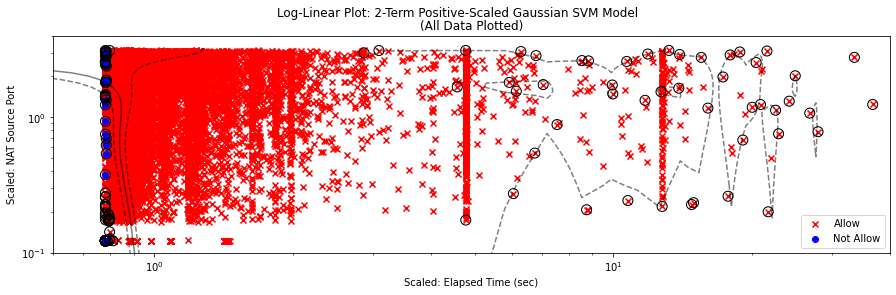

In [85]:
plt.figure(figsize=(15,4))
plot_svc_vectors(svm_rbf2_pos, X_train_sc[top2_terms]+1, y_train, top2_terms)
plot_svc_decision_boundary(svm_rbf2_pos)
plt.suptitle('Log-Linear Plot: 2-Term Positive-Scaled Gaussian SVM Model')
plt.title('(All Data Plotted)')
plt.legend(loc='lower right')
plt.xlim([0.6, 40])
plt.ylim([0.1, 4])
plt.xscale('log')
plt.yscale('log')
plt.show()

#### Full Gaussian Model (All Terms)

In [46]:
svm_rbf_acc = pd.DataFrame()
for i in [0.1, 0.5, 1, 10, 100, 200, 300, 500, 800]:
    svm_rbf = SVC(kernel='rbf', gamma='auto', C=i)
    svm_rbf.fit(X_train_sc, y_train)
    y_hat_train = svm_rbf.predict(X_train_sc)
    y_hat_test = svm_rbf.predict(X_test_sc)
    svm_rbf_acc = svm_rbf_acc.append({'C': i,
                                        '# support vectors': len(svm_rbf.support_vectors_),
                                        'accuracy_train': accuracy_score(y_train, y_hat_train),
                                        'accuracy_test': accuracy_score(y_test, y_hat_test)},
                                       ignore_index=True)
    print("C =", i, "complete")
clear_output()
svm_rbf_acc

,C,# support vectors,accuracy_train,accuracy_test
0,0.1,4484.0,0.981470,0.981943
1,0.5,2483.0,0.991934,0.991607
2,1.0,1937.0,0.997406,0.997202
3,10.0,735.0,0.997994,0.997813
4,100.0,419.0,0.998103,0.998016
5,200.0,365.0,0.998212,0.998118
6,300.0,336.0,0.998387,0.998118
7,500.0,292.0,0.998518,0.998169
8,800.0,282.0,0.998561,0.998169


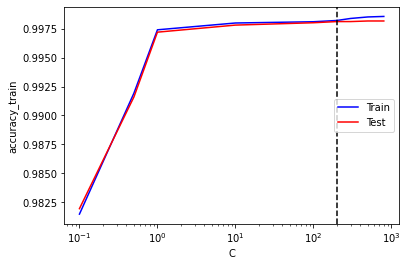

In [47]:
sns.lineplot(data = svm_rbf_acc, x='C', y='accuracy_train', color='blue')
sns.lineplot(data = svm_rbf_acc, x='C', y='accuracy_test', color='red')
plt.legend(['Train','Test'], loc='center right')
plt.axvline(200, color='black', ls='--') 
plt.xscale('log')
plt.show()

In [48]:
svm_rbf = SVC(kernel='rbf', gamma='auto', C=200)
svm_rbf.fit(X_train_sc, y_train)
y_hat_train_rbf_full = svm_rbf.predict(X_train_sc)
y_hat_test_rbf_full = svm_rbf.predict(X_test_sc)
print('# support vectors', len(svm_rbf.support_vectors_))
print('accuracy_train', accuracy_score(y_train, y_hat_train_rbf_full))
print('accuracy_test', accuracy_score(y_test, y_hat_test_rbf_full))

# support vectors 365
accuracy_train 0.9982124171607952
accuracy_test 0.998118006103764


In [49]:
print("2-Factor Linear Conf Matrix:\n", confusion_matrix(y_test, y_hat_test2))

2-Factor Linear Conf Matrix:
 [[ 8364     4]
 [   61 11231]]


In [51]:
print("Full Linear Conf Matrix:\n", confusion_matrix(y_test, y_hat_test_full))

Full Linear Conf Matrix:
 [[ 8364     4]
 [   41 11251]]


In [86]:
print("2-Factor Gaussian Conf Matrix:\n", confusion_matrix(y_test, y_hat_test_rbf2))

2-Factor Gaussian Conf Matrix:
 [[ 8364     4]
 [   35 11257]]


In [52]:
print("Full Gaussian Conf Matrix:\n", confusion_matrix(y_test, y_hat_test_rbf_full))

Full Gaussian Conf Matrix:
 [[ 8365     3]
 [   34 11258]]


# Conclusion <a id='conclusion'>

### Final Model Proposal <a id='final-model-proposal'/>

### Future Considerations and Model Enhancements <a id='model-enhancements'/>

# References <a id='references'>

[1]